In [1]:
from velocity import get
from velocity.velocity_data import rotational_data
from velocity.velocity_data import starforming
from velocity.velocity_data import old
from velocity.velocity_data import young
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import h5py
import csv
import os
from scipy import stats
import warnings

In [2]:
with h5py.File('galaxy_population_data_'+str(2)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    maximum_merger_ratio_30kpc_current_fraction = f['maximum_merger_ratio_30kpc_current_fraction'][:]

In [3]:
warnings.filterwarnings('ignore')

PSB_selection = (median_age<=1.2)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
intermediate_quiescent_selection = (median_age>1.2)&(median_age<=1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
old_quiescent_selection = (median_age>1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
starforming_selection = (np.log10(newbin_current_SFR/10**(total_mass))>-10.5)

In [ ]:
lambda_starforming,bulge_ratio_starforming = starforming(ids,total_mass,starforming_selection)
lambda_old,bulge_ratio_old = old(ids,total_mass,old_quiescent_selection)
lambda_young,bulge_ratio_young = young(ids,total_mass,PSB_selection)

In [5]:
#data for seeded 80 random star-forming galaxies
np.random.seed(0)
rand_M = np.random.choice(total_mass[starforming_selection], 80, replace=False)

In [6]:
print(np.shape(total_mass[old_quiescent_selection]),np.shape(lam_old))

(76,) (76,)


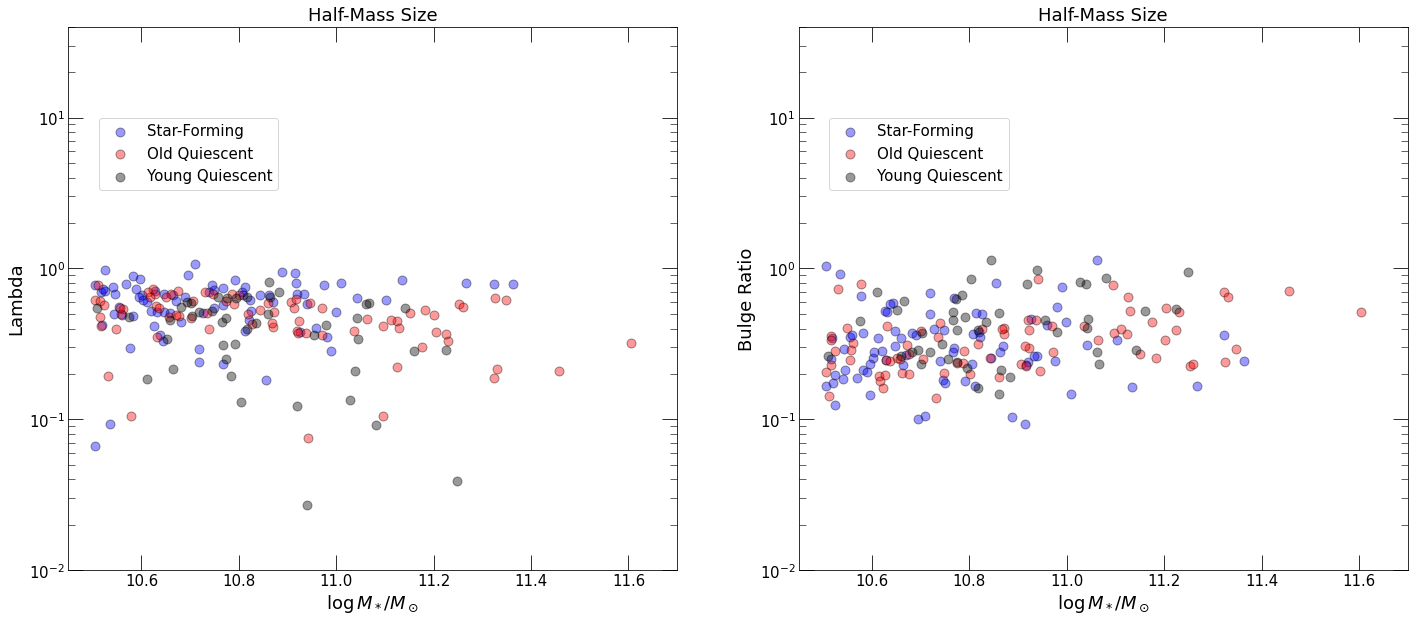

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(24, 10))
f.set_facecolor('w')
#panel 3: half-mass radii
ax1.scatter((rand_M), lambda_starforming, c='blue', s=80, alpha = 0.4, edgecolors='k', label='Star-Forming')
ax1.scatter((total_mass[old_quiescent_selection]), lambda_old, c='red', s=80, alpha = 0.4, edgecolors='k', label='Old Quiescent')
ax1.scatter((total_mass[PSB_selection]), lambda_young, c='k', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent')
ax1.scatter(np.median(rand_M), np.median(lambda_starforming), c='blue', edgecolors='k', s=800, marker='*', lw=1)
ax1.scatter(np.median(total_mass[old_quiescent_selection]), np.median(lambda_old), c='red', edgecolors='k', s=800, marker='*', lw=1)
ax1.scatter(np.median(total_mass[PSB_selection]), np.median(lambda_young, c='black', s=1000, edgecolors='black', marker='*', lw=1)
ax1.legend(loc=(0.05, 0.7), fontsize=15, frameon=True)
ax1.set_ylim(0.01, 40)
ax1.set_xlim(10.45, 11.7)
ax1.set_xlabel('$\log \, M_*/M_\odot$', fontsize=18)
ax1.set_ylabel('Lambda', fontsize=18)
ax1.set_yscale('log')
ax1.set_title('Half-Mass Size', fontsize=18)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)


ax2.scatter((rand_M), bulge_ratio_starforming, c='blue', s=80, alpha = 0.4, edgecolors='k', label='Star-Forming')
ax2.scatter((total_mass[old_quiescent_selection]), bulge_ratio_old, c='red', s=80, alpha = 0.4, edgecolors='k', label='Old Quiescent')
ax2.scatter((total_mass[PSB_selection]), bulge_ratio_young, c='k', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent')
ax2.scatter(np.median(rand_M), np.median(bulge_ratio_starforming), c='blue', edgecolors='k', s=800, marker='*', lw=1)
ax2.scatter(np.median(total_mass[old_quiescent_selection]), np.median(bulge_ratio_old), c='red', edgecolors='k', s=800, marker='*', lw=1)
ax2.scatter(np.median(total_mass[PSB_selection]), np.median(bulge_ratio_young), c='black', s=1000, edgecolors='black', marker='*', lw=1)
ax2.legend(loc=(0.05, 0.7), fontsize=15, frameon=True)
ax2.set_ylim(0.01, 40)
ax2.set_xlim(10.45, 11.7)
ax2.set_xlabel('$\log \, M_*/M_\odot$', fontsize=18)
ax2.set_ylabel('Bulge Ratio', fontsize=18)
ax2.set_yscale('log')
ax2.set_title('Half-Mass Size', fontsize=18)
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=7)
ax2.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)

In [8]:
print("Galaxy ID: " + "\tGalaxy Number: " + "\tAverage Lambda:")
with open('galaxy_num.csv', 'w',newline='') as f:
    fieldnames = ['Galaxy ID', 'Galaxy Number','Average Lambda']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(10):
        id = ids[i]

        r, vel_circ, v_r, r_v_r, e_v, bins, mass_num, vel, radius, v_phi = rotational_data(id)

        vel_new,r_new,x = stats.binned_statistic(radius,vel,statistic = 'std',bins = np.linspace(0,30,60))
        r_binned = (r_new[1:]+r_new[:-1])/2
        
        v_phi_new,r_phi_new,x = stats.binned_statistic(radius,v_phi,statistic = 'mean',bins = np.linspace(0,30,60))
        r_phi_binned = (r_phi_new[1:]+r_phi_new[:-1])/2
        
        
        lam = np.mean(e_v)

        plt.plot(r,vel_circ, label = "v_circ")
        plt.plot(r_v_r,v_r, label = "v_r")
        plt.plot(r_binned,vel_new, label = "vel_disp")
        plt.plot(r_phi_binned,v_phi_new, label = "v_phi")

        plt.legend()

        plt.xlabel("Radius (kpc)")
        plt.ylabel("Orbital Speed (km/s)")
        plt.title("Orbital Speed vs Radius")
        
        plt.show()

        plt.hist(e_v,bins=bins)
        plt.show()

        print(str(id) + "\t\t" + str(mass_num) + '\t' + str(lam))

        writer.writerow({'Galaxy ID': str(id), 'Galaxy Number': str(mass_num), 'Average Lambda': str(lam)})
       
    f.close()

Galaxy ID: 	Galaxy Number: 	Average Lambda:


ValueError: not enough values to unpack (expected 10, got 2)